# HW 3 Problem 2: Convolutional Neural Network
## Jennifer Bryson

### Problem 2: Convolutional Neural Network (CNN)

Suppose we have two black and white images in a total of 156 pixels (i.e. we have a $12 \times 13$ matrix whose entries are 0 for while and 1 for black).  We'd like our neural network to learn the difference between these two images.  By itself this is easy.  But we'd like to add noise to our images so now the entries of the $12 \times 13$ matrix aren't just 0 and 1.  Furthermore, we'd like to be able to move around our image inside this $12 \times 13$ frame and have the program still recognize it as being that image.  To do this, we'll use a convolutional neural network (CNN).  

First, let's generate some data based on our two starting images: a giraffe head (imagination required) and a pi symbol.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

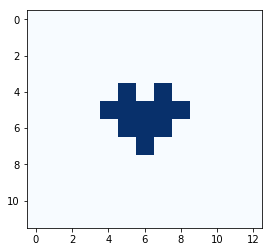

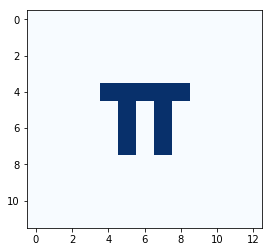

In [2]:
# make the starting images:
num_rows =12
num_cols = 13
dim_of_data_point = num_rows * num_cols
alpha=0.1  #alpha in (0,1) -- smaller alpha makes each point cloud more tightly together
num_train=240*2 #make sure you pick a number that is divisible by 12!!!!

center1 = np.zeros((12*13,1))
start_pt = 13*4+4 
for i in [1,3,13,14,15,16,17,27,28,29,41]:
    center1[start_pt+i] = 1
plt.imshow(center1.reshape(12,13), cmap='Blues')
plt.show()

center2 = np.zeros((12*13,1))
start_pt = 13*4+4 
for i in [0,1,2,3,4,14,16,27,29,40,42]:
    center2[start_pt+i] = 1
plt.imshow(center2.reshape(12,13), cmap='Blues')
plt.show()

Let's create some more training data in the form of the image shifted to 5 other locations in the $12 \times 13$ frame.

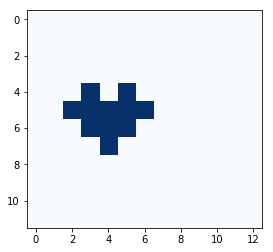

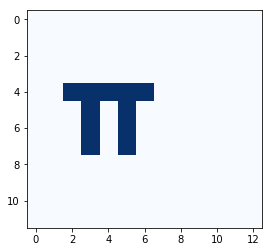

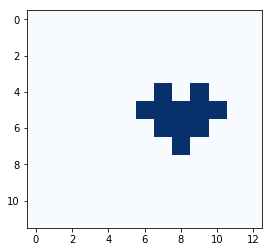

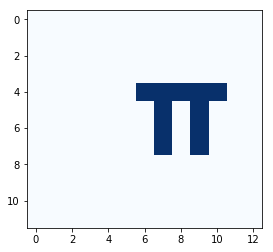

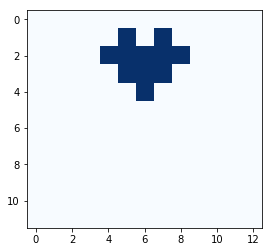

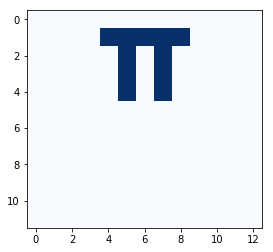

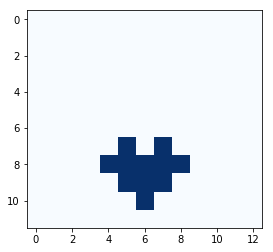

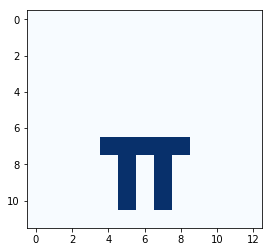

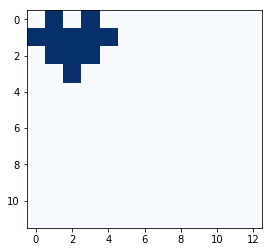

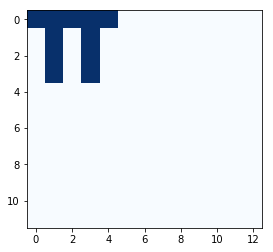

In [3]:
#move the figures 2 units left
gshift1 = np.zeros((num_rows*num_cols,1))
start_pt = 13*4+4 -2
for i in [1,3,13,14,15,16,17,27,28,29,41]:
    gshift1[start_pt+i] = 1
plt.imshow(gshift1.reshape(num_rows,num_cols), cmap='Blues')
plt.show()

pshift1 = np.zeros((num_rows*num_cols,1))
start_pt = 13*4+4 -2
for i in [0,1,2,3,4,14,16,27,29,40,42]:
    pshift1[start_pt+i] = 1
plt.imshow(pshift1.reshape(num_rows,num_cols), cmap='Blues')
plt.show()

#move the figures 2 units right
gshift2 = np.zeros((num_rows*num_cols,1))
start_pt = 13*4+4 +2
for i in [1,3,13,14,15,16,17,27,28,29,41]:
    gshift2[start_pt+i] = 1
plt.imshow(gshift2.reshape(num_rows,num_cols), cmap='Blues')
plt.show()

pshift2 = np.zeros((num_rows*num_cols,1))
start_pt = 13*4+4 +2
for i in [0,1,2,3,4,14,16,27,29,40,42]:
    pshift2[start_pt+i] = 1
plt.imshow(pshift2.reshape(num_rows,num_cols), cmap='Blues')
plt.show()

#move the figures 3 units up
gshift3 = np.zeros((num_rows*num_cols,1))
start_pt = 13*4+4 -13*3
for i in [1,3,13,14,15,16,17,27,28,29,41]:
    gshift3[start_pt+i] = 1
plt.imshow(gshift3.reshape(num_rows,num_cols), cmap='Blues')
plt.show()

pshift3 = np.zeros((num_rows*num_cols,1))
start_pt = 13*4+4 -13*3
for i in [0,1,2,3,4,14,16,27,29,40,42]:
    pshift3[start_pt+i] = 1
plt.imshow(pshift3.reshape(num_rows,num_cols), cmap='Blues')
plt.show()

#move the figures 3 units down
gshift4 = np.zeros((num_rows*num_cols,1))
start_pt = 13*4+4 +13*3
for i in [1,3,13,14,15,16,17,27,28,29,41]:
    gshift4[start_pt+i] = 1
plt.imshow(gshift4.reshape(num_rows,num_cols), cmap='Blues')
plt.show()

pshift4 = np.zeros((num_rows*num_cols,1))
start_pt = 13*4+4 +13*3
for i in [0,1,2,3,4,14,16,27,29,40,42]:
    pshift4[start_pt+i] = 1
plt.imshow(pshift4.reshape(num_rows,num_cols), cmap='Blues')
plt.show()

#move the figures to the top right corner
gshift5 = np.zeros((num_rows*num_cols,1))
start_pt = 0
for i in [1,3,13,14,15,16,17,27,28,29,41]:
    gshift5[start_pt+i] = 1
plt.imshow(gshift5.reshape(num_rows,num_cols), cmap='Blues')
plt.show()

pshift5 = np.zeros((num_rows*num_cols,1))
start_pt = 0
for i in [0,1,2,3,4,14,16,27,29,40,42]:
    pshift5[start_pt+i] = 1
plt.imshow(pshift5.reshape(num_rows,num_cols), cmap='Blues')
plt.show()

In [4]:
#make the training points by adding noise to the images created above
points_c1 = (alpha * np.random.randn(dim_of_data_point,num_train/12) + center1).T
points_c2 = (alpha * np.random.randn(dim_of_data_point,num_train/12) + center2).T  #each row of points_c2 is a noisy image of pi
points_gs1 = (alpha * np.random.randn(dim_of_data_point,num_train/12) + gshift1).T
points_ps1 = (alpha * np.random.randn(dim_of_data_point,num_train/12) + pshift1).T 
points_gs2 = (alpha * np.random.randn(dim_of_data_point,num_train/12) + gshift2).T
points_ps2 = (alpha * np.random.randn(dim_of_data_point,num_train/12) + pshift2).T 
points_gs3 = (alpha * np.random.randn(dim_of_data_point,num_train/12) + gshift3).T
points_ps3 = (alpha * np.random.randn(dim_of_data_point,num_train/12) + pshift3).T 
points_gs4 = (alpha * np.random.randn(dim_of_data_point,num_train/12) + gshift4).T
points_ps4 = (alpha * np.random.randn(dim_of_data_point,num_train/12) + pshift4).T 
points_gs5 = (alpha * np.random.randn(dim_of_data_point,num_train/12) + gshift5).T
points_ps5 = (alpha * np.random.randn(dim_of_data_point,num_train/12) + pshift5).T 

points = np.vstack((points_c1, points_gs1,points_gs2,points_gs3,points_gs4,points_gs5, \
                    points_c2,points_ps1,points_ps2,points_ps3,points_ps4,points_ps5)) #rows of are training points

xhat = np.hstack((np.ones((num_train,1)), points))  #add ones to the front for bias purposes

Let's look at a random training point just to make sure it looks like we expect it to.

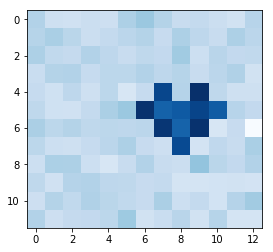

In [5]:
rand_train = np.random.randint(num_train) #select a random number out of the number of training points we have
random_point = points[rand_train,:]
test2 = np.reshape(random_point, (num_rows, num_cols))
plt.imshow(test2, cmap='Blues')
plt.show()

Great!  So now we have our fuzzy data that also moves around the images to 6 different locations per image.  We also added in a 1 in front of every data vector for biasing, this makes $xhat \in R^{num\_train \times dim\_of\_data\_point +1}$. 

For CNN's we need to select a frame with which we will move around the total $12 \times 13$ image and hope to find features inside that frame which will help us identify if we're looking at image 1 or image 2.  We will select a $4 \times 4$ frame size.  Because we're using a $4 \times 4$ frame, we'll need 17 weights (4*4 + 1 for the bias).  And for each $4 \times 4$ block in the image we'll multiply those weights by the entries in that portion of the image.  Doing this hopefully finds one "feature" that distinguishes between the two images.  To improve chances, we'll repeat this 5 times in hopes of finding 5 distinguishing features.

As we're doing just a simple CNN, we will only use this one layer of feature finding.  After we multiply the first layer of weights by the entries in each $4 \times 4$ frame, we will thus have a vector of length 90 (since we will have 90 different $4 \times 4$ frame options).  Next we will send all 90 of these outputs through the sigmoid function.  We then do the simplest "pooling" layer where we just replace this vector by it's mean of all the entries.  As noted already, we will do this 5 times in hopes of finding 5 distinguising features.  So now we have a five dimensional vector.  We dot this vector with a second layer of weights (this layer has 6 weights; 5 for the 5 features and 1 for offset).  We again send this through the sigmoid function and that is our final output.  We want the output of images of the giraffe head to be 1 and we want images of the pi symbol to be 0.  Using backpropagation, we will train our model by iterations improving through stochastic gradient descent.

In [6]:
num_feature_finders = 5
frame_size = 16 #since we consider 4 by 4 frames at a time

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [8]:
def feed_forward(train_point, w_layer1, w_layer2, num_feature_finders):
    avg_z = np.zeros((num_feature_finders,1))
    for l in range(num_feature_finders):
        #rand_train = np.random.randint(num_train) #select a random number out of the number of training points we have
        #train_point = xhat[rand_train,:]

        
        num_frames = (num_rows-3)*(num_cols-3)
        frame_info = np.ones((num_frames,16))
        frame_starts = [1, 2, 3, 4, 5,6,7,8,9,10,14,15,16,17,18,19,20,21,22,23,27,28,29,30,31,32,33,34,35,36,40,41,42,43,44,45,46,47,48,49,53,54,55,56,57,58,59,60,61,62,66,67,68,69,70,71,72,73,74,75,79,80,81,82,83,84,85,86,87,88,92,93,94,95,96,97,98,99,100,101,105,106,107,108,109,110,111,112,113,114]
        frame_adds = [0,1,2,3,13,13+1,13+2,13+3,13*2,13*2+1,13*2+2,13*2+3,13*3+0,13*3+1,13*3+2,13*3+3]
        for i in range(len(frame_starts)):
            for j in range(16):
                frame_info[i,j]= train_point[frame_starts[i]+frame_adds[j]]

        frame_info = np.hstack((np.ones((num_frames,1)),frame_info))

        a_layer1 = np.matmul(frame_info, w_layer1[:,l])
        z_layer1 = np.zeros((len(a_layer1),1))
        for i in range(len(a_layer1)):
            z_layer1[i] = sigmoid(a_layer1[i])
        avg_z[l] = np.mean(z_layer1)
    #print avg_z

    #print avg_z    
    avg_z_hat = np.vstack(([1],avg_z)) # add a one in front of avg_z to allow for bias
    #print avg_z_hat
    a_layer2 = np.matmul(avg_z_hat.T,w_layer2)
    output = sigmoid(a_layer2)
    return output, a_layer2, avg_z_hat, frame_info

In [9]:
def cnn_training(num_iter,eta):
    
    #we'll need to clear the weights each time we do a run
    num_feature_finders = 5
    w_layer1 = np.random.randn(frame_size+1,num_feature_finders)
    w_layer2 = np.random.randn(num_feature_finders+1,1)
    num_frames = (num_rows-3)*(num_cols-3)
    
    for l in range(num_iter):
        rand_train = np.random.randint(num_train) #select a random number from the number of training points we have
        train = xhat[rand_train,:] # pick out that random training point for your stochatic gradient descent
        output, a_layer2, avg_z_hat, frame_info = feed_forward(train, w_layer1, w_layer2, num_feature_finders)
        if rand_train < num_train/2: # if the training point is from image 1
            #update layer_1 weights
            for j in range(frame_size+1):
                for i in range(num_feature_finders):
                    intermediate_sum = 0
                    for k in range(num_frames):
                        intermediate_sum = intermediate_sum + sigmoid(np.dot(frame_info[k,:],w_layer1[:,i]))*(1-sigmoid(np.dot(frame_info[k,:],w_layer1[:,i])))*frame_info[k,j] 
                    w_layer1[j,i] = w_layer1[j,i] - eta * (output-1)*sigmoid(a_layer2)*(1-sigmoid(a_layer2)) \
                    *w_layer2[i+1,0]/float(16)*intermediate_sum
             
            #update layer_2 weights
            for j in range(num_feature_finders+1):
                w_layer2[j,0] = w_layer2[j,0] - eta * (output-1)*sigmoid(a_layer2)*(1-sigmoid(a_layer2)) * avg_z_hat[j]

        else:
            #update layer_1 weights
            for j in range(frame_size+1):
                for i in range(num_feature_finders):
                    intermediate_sum = 0
                    for k in range(num_frames):
                        intermediate_sum = intermediate_sum + sigmoid(np.dot(frame_info[k,:],w_layer1[:,i]))*(1-sigmoid(np.dot(frame_info[k,:],w_layer1[:,i])))*frame_info[k,j] 
                    w_layer1[j,i] = w_layer1[j,i] - eta * output*sigmoid(a_layer2)*(1-sigmoid(a_layer2)) \
                    *w_layer2[i+1,0]/float(16)*intermediate_sum
                 
            #update layer_2 weights
            for j in range(num_feature_finders+1):
                w_layer2[j,0] = w_layer2[j,0] - eta * output*sigmoid(a_layer2)*(1-sigmoid(a_layer2)) * avg_z_hat[j]

    return w_layer1,w_layer2

Next we create our accuracy function.  For each of the two images, we will create a noisy version of the picture that is 1 pixel away for each of the 1 pixel away possibilities (there are 8 ways to move 1 pixel away - up, diagonal upper right, right, diagonal lower right, down, diagonal lower down, left, diagonal upper left).  Thus there will be 16 tests for the 1 pixel away case.  We will determine what fraction of those 16 tests were accurately classified.  We will do this for 2 pixels away, 3 pixels away, and 4 pixels away as well.  Thus our accuracy output will be four numbers, to represent the accuracy for 1,2,3, and 4 pixels away.

In [16]:
def accuracy(w_layer1, w_layer2):
    #accuracy one pixel away:
    one_away_count = 0
    one_away_starts = [13*3+4,13*3+4+1,13*4+4+1,13*5+4+1,13*5+4,13*5+4-1,13*4+4-1,13*3+4-1]
    num_test_one_away = 2*len(one_away_starts)
    #for each image of the giraffe head that is 1 away from the start
    for k in range(len(one_away_starts)):
        test = np.zeros((num_rows*num_cols,1))
        for i in [1,3,13,14,15,16,17,27,28,29,41]:
            test[one_away_starts[k]+i] = 1
        test_hat = np.vstack(([1],test))
        #test to see if it was correctly classified
        if feed_forward(test_hat, w_layer1, w_layer2,num_feature_finders)[0][0,0] >= 0.5: #if accurately labeled
            one_away_count = one_away_count + 1
    #for each image of the pi symbol that is 1 away from the start
    for k in range(len(one_away_starts)):
        test = np.zeros((num_rows*num_cols,1))
        for i in [0,1,2,3,4,14,16,27,29,40,42]:
            test[one_away_starts[k]+i] = 1
        test_hat = np.vstack(([1],test))
        #test to see if it was correctly classified
        if feed_forward(test_hat, w_layer1, w_layer2,num_feature_finders)[0][0,0] < 0.5: #if accurately labeled
            one_away_count = one_away_count + 1
    one_away_accuracy = float(one_away_count)/float(num_test_one_away)
    print 'Percentage of 1 pixel away images that are correctly classified is', one_away_accuracy
    

    two_away_count = 0
    two_away_starts = [13*2+4,13*2+4+1,13*2+4+2,13*3+4+2,13*4+4+2,13*5+4+2,13*6+4+2,13*6+4+1,13*6+4,13*6+4-1,13*6+4-2, \
                      13*5+4-2,13*4+4-2,13*3+4-2,13*2+4-2,13*2+4-1]
    num_test_two_away = 2*len(two_away_starts)
    for k in range(len(two_away_starts)):
        test = np.zeros((num_rows*num_cols,1))
        for i in [1,3,13,14,15,16,17,27,28,29,41]:
            test[two_away_starts[k]+i] = 1
        test_hat = np.vstack(([1],test))
        if feed_forward(test_hat, w_layer1, w_layer2,num_feature_finders)[0][0,0] >= 0.5: #if accurately labeled
            two_away_count = two_away_count + 1
    for k in range(len(two_away_starts)):
        test = np.zeros((num_rows*num_cols,1))
        for i in [0,1,2,3,4,14,16,27,29,40,42]:
            test[two_away_starts[k]+i] = 1
        test_hat = np.vstack(([1],test))
        if feed_forward(test_hat, w_layer1, w_layer2,num_feature_finders)[0][0,0] < 0.5: #if accurately labeled
            two_away_count = two_away_count + 1
    two_away_accuracy = float(two_away_count)/float(num_test_two_away)
    print 'Percentage of 2 pixels away images that are correctly classified is', two_away_accuracy
        

        
    three_away_count = 0
    three_away_starts = [14,15,16,17,18,19,20,14+13*1,14+13*2,14+13*3,14+13*4,14+13*5,14+13*6,93,94,95,96,97,98,20+13*1,20+13*2,20+13*3,20+13*4,20+13*5]
    num_test_three_away = 2*len(three_away_starts)
    for k in range(len(three_away_starts)):
        test = np.zeros((num_rows*num_cols,1))
        for i in [1,3,13,14,15,16,17,27,28,29,41]:
            test[three_away_starts[k]+i] = 1
        test_hat = np.vstack(([1],test))
        if feed_forward(test_hat, w_layer1, w_layer2,num_feature_finders)[0][0,0] >= 0.5: #if accurately labeled
            three_away_count = three_away_count + 1
    for k in range(len(three_away_starts)):
        test = np.zeros((num_rows*num_cols,1))
        for i in [0,1,2,3,4,14,16,27,29,40,42]:
            test[three_away_starts[k]+i] = 1
        test_hat = np.vstack(([1],test))
        if feed_forward(test_hat, w_layer1, w_layer2,num_feature_finders)[0][0,0] < 0.5: #if accurately labeled
            three_away_count = three_away_count + 1
    three_away_accuracy = float(three_away_count)/float(num_test_three_away)
    print 'Percentage of 3 pixels away images that are correctly classified is', three_away_accuracy
        
        
    four_away_count = 0
    four_away_starts = [0,1,2,3,4,5,6,7,8,13,26,39,52,65,78,91,104,105,106,107,108,109,110,111,112,8+13*1,8+13*2,8+13*3,8+13*4,8+13*5,8+13*6,8+13*7]
    num_test_four_away = 2*len(four_away_starts)
    for k in range(len(four_away_starts)):
        test = np.zeros((num_rows*num_cols,1))
        for i in [1,3,13,14,15,16,17,27,28,29,41]:
            test[four_away_starts[k]+i] = 1
        test_hat = np.vstack(([1],test))
        if feed_forward(test_hat, w_layer1, w_layer2,num_feature_finders)[0][0,0] >= 0.5: #if accurately labeled
            four_away_count = four_away_count + 1
    for k in range(len(four_away_starts)):
        test = np.zeros((num_rows*num_cols,1))
        for i in [0,1,2,3,4,14,16,27,29,40,42]:
            test[four_away_starts[k]+i] = 1
        test_hat = np.vstack(([1],test))
        if feed_forward(test_hat, w_layer1, w_layer2,num_feature_finders)[0][0,0] < 0.5: #if accurately labeled
            four_away_count = four_away_count + 1
    four_away_accuracy = float(four_away_count)/float(num_test_four_away)
    print 'Percentage of 4 pixels away images that are correctly classified is', four_away_accuracy
        
    
    return one_away_accuracy, two_away_accuracy, three_away_accuracy, four_away_accuracy

WARNING:  The following line trains the CNN, but it takes about 5 minutes.  Using 4000 iterations and a learning rate of 1.5, we see that we can get great accuracy, but that takes about 15 minutes.

In [58]:
w_layer1,w_layer2 = cnn_training(2000,2)

In [59]:
#when trained by 2000 iterations and eta = 2
accuracy(w_layer1,w_layer2)

Percentage of 1 pixel away images that are correctly classified is 1.0
Percentage of 2 pixels away images that are correctly classified is 1.0
Percentage of 3 pixels away images that are correctly classified is 1.0
Percentage of 4 pixels away images that are correctly classified is 0.9375


(1.0, 1.0, 1.0, 0.9375)

WARNING: The following code block takes about 2 hours...it runs through several different choices for the number of iterations and for the learning rate in order to see how they effect the accuracy.  The results are displayed in the table below.

In [55]:
iter_options = [1000,2000,3000,4000]
learn_rate_options = [1,1.5,2]
results_one = np.zeros((len(iter_options),len(learn_rate_options)))
results_two = np.zeros((len(iter_options),len(learn_rate_options)))
results_three = np.zeros((len(iter_options),len(learn_rate_options)))
results_four = np.zeros((len(iter_options),len(learn_rate_options)))
for i in range(len(iter_options)):
    for j in range(len(learn_rate_options)):
        w_layer1,w_layer2 = cnn_training(iter_options[i],learn_rate_options[j])
        one, two, three, four = accuracy(w_layer1,w_layer2)
        results_one[i,j] = one
        results_two[i,j] = two
        results_three[i,j] = three
        results_four[i,j] = four

Percentage of 1 pixel away images that are correctly classified is 0.5
Percentage of 2 pixels away images that are correctly classified is 0.5
Percentage of 3 pixels away images that are correctly classified is 0.5
Percentage of 4 pixels away images that are correctly classified is 0.5
Percentage of 1 pixel away images that are correctly classified is 0.5
Percentage of 2 pixels away images that are correctly classified is 0.5
Percentage of 3 pixels away images that are correctly classified is 0.5
Percentage of 4 pixels away images that are correctly classified is 0.5
Percentage of 1 pixel away images that are correctly classified is 1.0
Percentage of 2 pixels away images that are correctly classified is 1.0
Percentage of 3 pixels away images that are correctly classified is 1.0
Percentage of 4 pixels away images that are correctly classified is 1.0
Percentage of 1 pixel away images that are correctly classified is 0.5
Percentage of 2 pixels away images that are correctly classified is 

In [56]:
result_str = [['','','',''],['','','',''],['','','','']]

for i in range(len(learn_rate_options)):
    for j in range(len(iter_options)):
        result_str[i][j] = str(results_one[j,i])+ ',   ' + str(results_two[j,i])+ ',   '  + str(results_three[j,i])+ ',   '  + str(results_four[j,i])

               For each box, the values represent the accuracy for 1 pixel shift, 2 pixels shift, 3, and 4


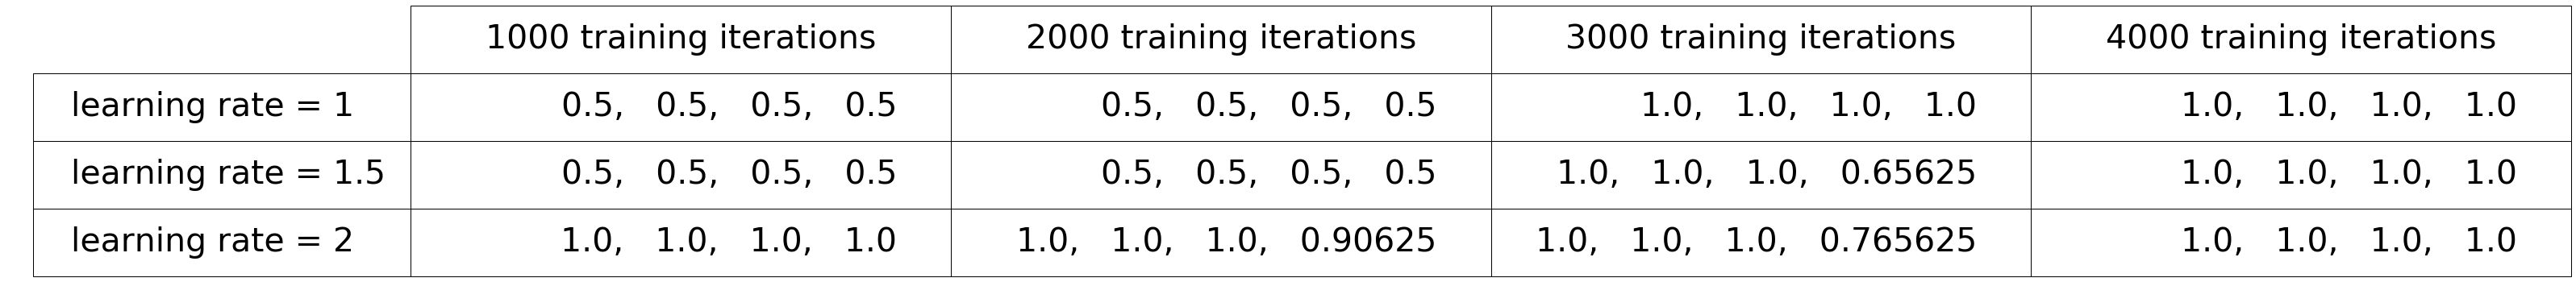

In [57]:
#make a table whose entries are strings of the mean +/- the std for each alpha,N pair
fig = plt.figure()
ax = fig.add_subplot(111)
col_labels = ('1000 training iterations', '2000 training iterations', '3000 training iterations', '4000 training iterations')
row_labels = ['learning rate = 1', 'learning rate = 1.5', 'learning rate = 2']

the_table = plt.table(cellText=result_str,
                      rowLabels=row_labels,
                      colLabels=col_labels,
                      loc='center left')
the_table.set_fontsize(44)
the_table.scale(8, 7)
ax.axis("off")
#plt.title('For each box, the values represent the accuracy for 1 pixel shift, 2 pixels shift, 3, and 4')
print '               For each box, the values represent the accuracy for 1 pixel shift, 2 pixels shift, 3, and 4'

plt.show()

It looks like we really need a lot of training iterations (or maybe I should've tried larger step sizes, but that appears to do worse for the 3000 iterations), but given 3000 iterations we get great results for shifts of 1,2, and 3 pixels away.  To get great results for 4 shifts away, we need 4000 iterations.  It would be interesting to considering 5-10 pixel shifts as well, but that has a significantly higher computational cost, since we'd have A LOT of $4 \times 4$ frames.  We could alternatively make the frame size larger, but I choose $4 \times 4$ since I didn't want the whole image to be able to fit inside the frame because I thought that'd make the problem easier.

****
#### Just saving some good weights

Below are some great weights that were trained with 5000 iterations and a learning rate of 1.4.  I've saved the weights, since it takes 30 minutes to reproduce them.

In [32]:
w_layer1_good = np.array([[ -2.60824265, -10.2623573 ,  -7.53733274,  -7.49342571,  -7.4139543 ],\
                 [ -1.01376756,  -2.60906469,   1.49974392,   3.14596094, 5.15544177],\
                 [ -2.63977925,   2.22045157,   4.46815529,   4.33122723,  -4.4141425 ],\
                 [ -0.01709672,   7.29178782,   4.68027215,  -0.29363287, 4.30206467],\
                 [ -0.76316602,   0.06124462,   1.58222955,  -2.72539393, -4.14960462],\
                 [ -1.22065824,   0.90311825,   3.21773872,   1.76578736, 2.17648108],\
                 [  0.34349289,   3.94729332,  -0.63457542,   3.74180209,  -7.5609744 ],\
                 [  3.17506237,   2.68688481,  -0.55057902,  -0.48536134, 2.92075647],\
                 [ -0.20678565,   3.66298767,   1.94942736,   0.99047265, 0.02365043],\
                 [ -0.31060237,   2.13174927,  -2.62177316,  -0.28192127, 3.14629902],\
                 [  0.75659613,  -0.19853923,  -3.12554997,   6.63790495, -4.79645697],\
                 [  0.69219226,  -2.28782117,  -2.57581506,   2.07875649, 7.90732635],\
                 [ -1.23234678,  -2.1475066 ,  -1.46067598,   1.44491453,  -0.7585258 ],\
                 [ -1.11103722,   0.06036836,  -2.7881711 ,  -3.49627833, 1.59883204],\
                 [  0.34201988,  -3.1118048 ,  -3.00393064,   8.39869662, -11.71054044],\
                 [ -0.34436475,  -4.30956098,  -3.88747575,  -3.37022649, 4.94981365],\
                 [ -1.26267778,  -1.91694447,  -3.07021019,   2.65967279, -6.34906026]])

(17, 5)


In [33]:
w_layer2_good = np.array([[ -0.70127628], [ -0.95985932],[  8.22391366],[  6.83882306],[  7.78631002],[-15.88906198]])

(6, 1)


In [34]:
accuracy(w_layer1_good,w_layer2_good)

Percentage of 1 pixel away images that are correctly classified is 1.0
Percentage of 2 pixels away images that are correctly classified is 1.0
Percentage of 3 pixels away images that are correctly classified is 1.0
Percentage of 4 pixels away images that are correctly classified is 1.0


(1.0, 1.0, 1.0, 1.0)